In [20]:
import re

# Specify the input file path
input_file_path = "2024_08_30 1min new sensor test3.csv"
# Initialize an empty list for entries
entries = []

# Read the content of the input file
with open(input_file_path, "r") as input_file:
    lines = input_file.readlines()

# Initialize variables for the current entry
current_entry = ""
in_entry = False

# Process the lines and create entries
for line in lines:
    if "Frame" in line and "Raw Sum=,," in line:
        # Start of a new entry
        if in_entry:
            entries.append(current_entry.strip())
            current_entry = ""
        in_entry = True
    
    # Add the line to the current entry
    current_entry += line

# Add the last entry
if in_entry:
    entries.append(current_entry.strip())

# Initialize lists to store extracted values
frame_numbers = []
raw_sums = []
single_max_values = []
greater_than_0 = []

max_non_zero_count = 0

# Process each block of text
for entry in entries:
    # Split the entry into lines
    lines = entry.strip().split('\n')

    # Extract frame number and raw sum from the first line
    first_line = lines[0]
    frame_match = re.search(r"Frame (\d+).*Raw Sum=,,(\d+)", first_line)
    if frame_match:
        frame_number = frame_match.group(1)
        raw_sum = frame_match.group(2)
        frame_numbers.append(frame_number)
        raw_sums.append(raw_sum)

    # Convert lines 6-16 into a list of lists and find the single max value
    count = 0
    data_lines = lines[5:16]  # Only consider lines 6-16 (index 5-15)
    int_data = [[int(value) for value in line.split(',')] for line in data_lines]
    max_value = max(max(int_data, key=lambda x: max(x)))
    single_max_values.append(max_value)
    
    # Count non-zero entries in lines 6-16
    for row in int_data:
        count += sum(1 for value in row if value > 0)
    
    # Update max_non_zero_count if current count is greater
    if count > max_non_zero_count:
        max_non_zero_count = count

# Populate greater_than_0 with the max_non_zero_count
greater_than_0 = [max_non_zero_count] * len(frame_numbers)

# Write the extracted values to the output file in the format "frame, single max value, raw sum"
with open("2024_08_30 1min new sensor test3.txt", "w") as output_file:
    for i in range(len(frame_numbers)):
        output_file.write(f"{frame_numbers[i]}, {single_max_values[i]}, {raw_sums[i]}, {greater_than_0[i]}\n")

print("Extracted values saved to '2024_08_30 1min new sensor test2.txt'.")

Extracted values saved to '2024_08_30 1min new sensor test2.txt'.


In [21]:
#Read the data from the file and store it in a list
import math
with open('2024_08_30 1min new sensor test3.txt', 'r') as file:
#with open('Fsocket_24hr_withentries.txt', 'r') as file:
    lines = file.readlines()

#Modify the data by dividing the second value
new_lines = []
for line in lines:
    values = line.strip().split(', ')
    #values = line.strip().split('\t')
    if len(values) >= 2:
        value1 = float(values[0])*(1/4)
        value2 = float(values[1])
        value3 = float(values[2])
        value4 = float(values[3])
        modified_value3 = value3/value4
        new_line = f'{value1:.4f}, {modified_value3:.4f}, {value2:.4f}\n'  # Create the new line
        #new_line = f'{value1:.4f}, {value2:.4f}, {value3:.4f}\n'  # Create the new line
        #new_line = f'{value1:.4f}, {modified_value3:.4f}\n'  # Create the new line
        #new_line = f'{value1:.4f}, {value2:.4f}\n'  # Create the new line
        new_lines.append(new_line)

# Write the modified data back to the same file
with open('update_2024_08_30 1min new sensor test3.txt', 'w') as file:
    file.writelines(new_lines)

print("Data has been updated and saved to '8thfeb_test3_2min_output.txt'.")

Data has been updated and saved to '8thfeb_test3_2min_output.txt'.


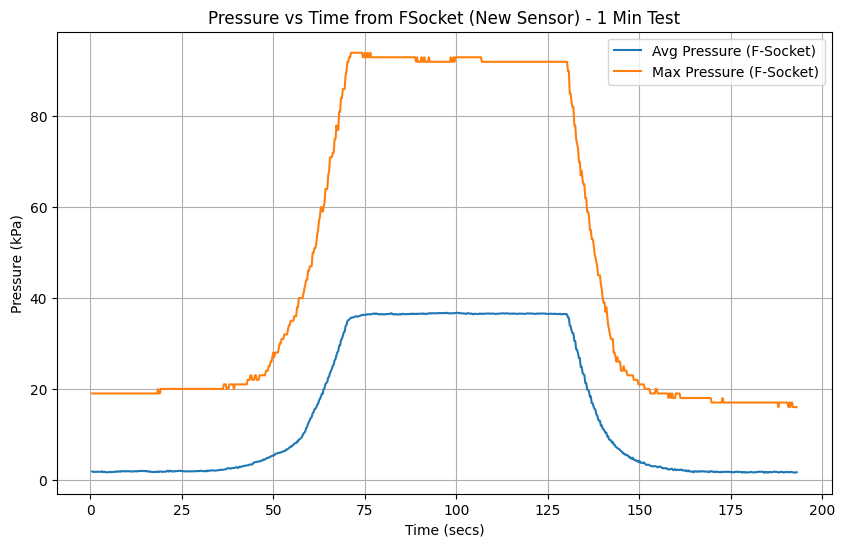

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the TXT file with comma-separated values
txt_data = pd.read_csv('update_2024_08_30 1min new sensor test3.txt', 
                       sep=',', 
                       header=0, 
                       names=['Time', 'Pressure', 'Max'])

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot TXT data
plt.plot(txt_data['Time'], txt_data['Pressure'], label='Avg Pressure (F-Socket)')
plt.plot(txt_data['Time'], txt_data['Max'], label='Max Pressure (F-Socket)')

# Add labels and title
plt.xlabel('Time (secs)')
plt.ylabel('Pressure (kPa)')
plt.title('Pressure vs Time from FSocket (New Sensor) - 1 Min Test')
plt.legend()

# Show plot
plt.grid(True)
plt.show()